In [613]:
import pandas as pd
import numpy as np
import seaborn as sns #Conditional plotting
import json
import os
import conda
os.environ["PROJ_LIB"] = r"C:\Users\DamilareAkinlotan\Anaconda\Library\share\basemap"
from mpl_toolkits.basemap import Basemap #for geographic visualizaton
import matplotlib.pyplot as plt #to plot in general
from numpy import arange #For barchart arrangemeant and spacing
import re #Regular Expressions

In [229]:
dete = pd.read_csv("dete_exit.csv", encoding = "Latin-1", na_values = "Not Stated")
tafe = pd.read_csv("tafe_exit.csv", encoding = "Latin-1")

In [230]:
dete.head()
#print (dete.info())

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [231]:
tafe.head()
#print (tafe.info())

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [232]:
dete_updated = dete.drop(dete.columns[28:49], axis = 1) #Columns dropped are not really needed in our analysis
dete_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [233]:
tafe_updated = tafe.drop(tafe.columns[17:66], axis = 1) #Columns dropped are not really needed in our analysis
tafe_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [234]:
dete_updated.columns = dete_updated.columns.str.replace(" ", "_").str.strip().str.lower()
dete_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [235]:
cols = []
for row in tafe_updated.columns:
    cols.append(row) #Did this to get how these columns were actually spelt cos i was facing issues with renaming them initially
    

tafe_updated.rename(columns={'Gender. \xa0\xa0\xa0\xa0What is your Gender?' : "gender",
'CurrentAge. \xa0\xa0\xa0\xa0Current Age' : "age",
'Employment Type. \xa0\xa0\xa0\xa0Employment Type' : "employment_status",
'Classification. \xa0\xa0\xa0\xa0Classification': "position"}, inplace=True)

tafe_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [236]:
tafe_updated.rename(columns = {"Reason for ceasing employment" : "separationtype","CESSATION YEAR" : "cease_date",
                                "Record ID" : "id"}, inplace = True)

#afe_updated.rename(columns = {"LengthofServiceOverall. Overall Length of Service at Institute (in years)" : "institute_service",
                                "LengthofServiceOverall. Overall Length of Service at Institute (in years)" : "role_service"}, inplace = True)

tafe_updated.columns #completed renaming my columns so they could be combined with other data types with similar column names

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [237]:
tafe_updated.columns = tafe_updated.columns.str.replace(" ", "_").str.replace(".", "").str.replace("-", "").str.strip().str.lower().str.replace("", "")
tafe_updated.columns #Data clmeaning to remove whitespaces and unneessay charactears from our columns names

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors_career_move__public_sector_',
       'contributing_factors_career_move__private_sector_',
       'contributing_factors_career_move__selfemployment',
       'contributing_factors_ill_health',
       'contributing_factors_maternity/family',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none', 'gender',
       'age', 'employment_status', 'position',
       'lengthofserviceoverall_overall_length_of_service_at_institute_(in_years)',
       'lengthofservicecurrent_length_of_service_at_current_workplace_(in_years)'],
      dtype='object')

In [238]:
tafe_updated.head()

,id,institute,workarea,cease_date,separationtype,contributing_factors_career_move__public_sector_,contributing_factors_career_move__private_sector_,contributing_factors_career_move__selfemployment,contributing_factors_ill_health,contributing_factors_maternity/family,...,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender,age,employment_status,position,lengthofserviceoverall_overall_length_of_service_at_institute_(in_years),lengthofservicecurrent_length_of_service_at_current_workplace_(in_years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [239]:
dete_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [240]:
dete_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [241]:
tafe_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [242]:
tafe_resignations = tafe_updated[tafe_updated["separationtype"]== "Resignation"]
tafe_resignations

,id,institute,workarea,cease_date,separationtype,contributing_factors_career_move__public_sector_,contributing_factors_career_move__private_sector_,contributing_factors_career_move__selfemployment,contributing_factors_ill_health,contributing_factors_maternity/family,...,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender,age,employment_status,position,lengthofserviceoverall_overall_length_of_service_at_institute_(in_years),lengthofservicecurrent_length_of_service_at_current_workplace_(in_years)
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,635065973820625000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,21  25,Temporary Full-time,Operational (OO),5-6,5-6
697,635066785175197000,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,635067716405666000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,635070442972541000,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


In [243]:
#pattern = r"[Nn]ational accounts" #Regular Expressions
#national_accounts = hap_dev["SpecialNotes"].str.contains(pattern)
#print (national_accounts.head())
#print (national_accounts.value_counts(dropna=False))

#national_accounts = hap_dev["SpecialNotes"].str.contains(pattern, na=False)
#merge_nat_acc = hap_dev[national_accounts]
#merge_nat_acc.head()

#pat = r"([1-2][0-9][0-9][0-9])"
#years = hap_dev["SpecialNotes"].str.extract(pat, expand=False) #expand can be set to True to make it a dataframe or False to make it a series
#years.head(10)

#pattern = r"(?P<Years>[1-2][0-9]{3})"
#test = hap_dev["SpecialNotes"].str.extractall(pattern)
#test.head()

#pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
#years = hap_dev["IESurvey"].str.extractall(pattern)
#first_two_year = years["First_Year"].str[0:2]
#years["Second_Year"] = first_two_year + years["Second_Year"]
#years.sort_values("Second_Year")
#years.head()

#pat = r"(?P<Years>[1-2][0-9]{3})"
#yearss = hap_dev["IESurvey"].str.extractall(pat)
#yearss.head()
#value_counts = yearss["Years"].value_counts()
#value_counts


#num_col = ["RT_user_norm","Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue", "Fandango_Stars"]

#bar_heights = fan_file[num_col].iloc[0].values
#bar_positions = arange(5) + 0.75

#fig, ax = plt.subplots()
#ax.bar(bar_positions, bar_heights, 0.6)
#tick_positions = range(1,6)
#ax.set_xticks(tick_positions)
#ax.set_xlabel("Rating Source")
#ax.set_ylabel("Average Rating")
#ax.set_title("Average User Rating for Avengers: Age of Ultron (2015)")
#ax.set_xticklabels(num_col, rotation = 90)
#plt.show()

#pv_melt = melt.pivot_table(index="variable", values ="value", aggfunc=np.mean)
#pv_melt.plot(kind = "pie", legend = False, y= "value")

#factors_impact = happiness2015[["Economy", "Family", "Health", "Freedom", "Trust", "Generosity"]].applymap(label)

In [244]:
pattern = r"Resignation"
regex_resign = dete_updated["separationtype"].str.contains(pattern, na=False)
dete_resignations = dete_updated[regex_resign]
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [245]:
dete_resignations["cease_date"].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [251]:
#?P<Years>
#pat = r"([1-2][0-9]{3})"
#dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(pat, expand = False)
#dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)
dete_resignations["cease_date"].value_counts(dropna=False)

C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [247]:
dete_resignations["dete_start_date"] #.value_counts(dropna=False) #.sort_index(ascending=False)

3      2005.0
5      1994.0
8      2009.0
9      1997.0
11     2009.0
        ...  
808    2010.0
815    2012.0
816    2012.0
819    2009.0
821       NaN
Name: dete_start_date, Length: 311, dtype: float64

In [248]:
tafe_resignations["cease_date"].value_counts(dropna=False) #.sort_index(ascending=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
NaN         5
2009.0      2
Name: cease_date, dtype: int64

In [249]:
#tafe_resignations.pivot_table(values = "cease_date", index ="id")
#tafe_group = tafe_resignations.groupby("cease_date")   #.plot(kind = "barh", title = "Grouped Resignation Years")    #.get_group(2013.0) .agg([list of functions])
#tafe_group_2009 = tafe_group.get_group(2009)
#tafe_group_2010 = tafe_group.get_group(2010)
#tafe_group_2011 = tafe_group.get_group(2011)
#tafe_group_2012 = tafe_group.get_group(2012)
#tafe_group_2013 = tafe_group.get_group(2013)

In [252]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)
dete_resignations["dete_start_date"] = dete_resignations["dete_start_date"].astype(float)
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"] #This vectorized operation was carried out so we can have the same column as institute_service in tafe_resignations
dete_resignations

C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,2013.0,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN,3.0
815,817,Resignation-Other employer,2014.0,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN,2.0
816,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN,2.0
819,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,5.0


In [253]:
tafe_resignations

,id,institute,workarea,cease_date,separationtype,contributing_factors_career_move__public_sector_,contributing_factors_career_move__private_sector_,contributing_factors_career_move__selfemployment,contributing_factors_ill_health,contributing_factors_maternity/family,...,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender,age,employment_status,position,lengthofserviceoverall_overall_length_of_service_at_institute_(in_years),lengthofservicecurrent_length_of_service_at_current_workplace_(in_years)
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,635065973820625000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,21  25,Temporary Full-time,Operational (OO),5-6,5-6
697,635066785175197000,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,635067716405666000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,635070442972541000,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


In [304]:
tafe_resignations.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors_career_move__public_sector_',
       'contributing_factors_career_move__private_sector_',
       'contributing_factors_career_move__selfemployment',
       'contributing_factors_ill_health',
       'contributing_factors_maternity/family',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied'],
      dtype='object')

In [256]:
tafe_resignations["contributing_factors_dissatisfaction"].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: contributing_factors_dissatisfaction, dtype: int64

In [257]:
tafe_resignations["contributing_factors_job_dissatisfaction"].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: contributing_factors_job_dissatisfaction, dtype: int64

In [299]:
tafe_resignations.rename(columns = {"lengthofserviceoverall_overall_length_of_service_at_institute_(in_years)" : "institute_service",
                                "lengthofservicecurrent_length_of_service_at_current_workplace_(in_years)" : "role_service"}, inplace = True)

In [300]:
#This function was crdated to update values in the dissatisfaction columns, to NaN, True, or False
def update_val(x):
    if pd.isnull(x):
        return np.nan
    elif x == '-':
        return False
    else:
        return True
    
#This line is to create a column that says if th employee was dissatisfied and hence the reason for their resignation
tafe_resignations["dissatisfied"] = tafe_resignations[["contributing_factors_dissatisfaction", "contributing_factors_job_dissatisfaction"]].applymap(update_val).any(axis =1, skipna=False)

tafe_resignations_up = tafe_resignations.copy() #This line is to prevent a settingwithcopy warning from popping up
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [301]:
test["contributing_factors_dissatisfaction"].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: contributing_factors_dissatisfaction, dtype: int64

In [302]:
test["contributing_factors_job_dissatisfaction"].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: contributing_factors_job_dissatisfaction, dtype: int64

In [303]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied'],
      dtype='object')

In [294]:
#job_dissatisfaction, dissatisfaction_with_the_department, physical_work_environment, lack_of_recognition, lack_of_job_security
#work_location, employment_conditions, work_life_balance, workload

#This line is to create a column that says if th employee was dissatisfied and hence the reason for their resignation
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment", "lack_of_recognition", "lack_of_job_security",
                                                      "work_location", "employment_conditions", "work_life_balance", "workload"]].any(axis =1, skipna=False)

#This line is to prevent a settingwithcopy warning from popping up
dete_resignations_up = dete_resignations.copy() 
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    162
True     149
Name: dissatisfied, dtype: int64

In [306]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [307]:
tafe_resignations_up

,id,institute,workarea,cease_date,separationtype,contributing_factors_career_move__public_sector_,contributing_factors_career_move__private_sector_,contributing_factors_career_move__selfemployment,contributing_factors_ill_health,contributing_factors_maternity/family,...,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,634139903350000000,TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,634146578511788000,TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,634147506906311000,TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,634152007975694000,TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,634153745310374000,TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,635065973820625000,TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,21  25,Temporary Full-time,Operational (OO),5-6,5-6,False
697,635066785175197000,TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2,False
698,635067716405666000,TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
699,635070442972541000,TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2,False


In [2]:
dete_resignations_up

NameError: name 'dete_resignations_up' is not defined

In [ ]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis = 0)
combined_updated = combined.dropna(thresh=500, axis=1)
combined_updated

In [330]:
#pattern = r"Resignation"
#pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
#years = hap_dev["SpecialNotes"].str.extract(pat, expand=False) #expand can be set to True to make it a dataframe or False to make it a series
#regex_resign = dete_updated["separationtype"].str.contains(pattern, na=False)
#dete_resignations = dete_updated[regex_resign]
#dete_resignations

pat = r"(\d+)"
combined_updated["institute_service"] = combined_updated["institute_service"].astype(str).str.extract(pat, expand = False)

combined_updated["institute_service"] = combined_updated["institute_service"].astype(float)
combined_updated["institute_service"].value_counts(dropna=False)

C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [336]:
def maps(x):
    if pd.isnull(x):
        return np.nan
    elif x<3:
        return "New: Less than 3 years at a company"
    elif x>=3 and x<=6:
        return "Experienced: 3-6 years at a company"
    elif x>=7 and x<=10:
        return "Established: 7-10 years at a company"
    elif x>= 11:
        return "Veteran: 11 or more years at a company"
    
    
combined_updated["service_cat"] = combined_updated["institute_service"].apply(maps)

C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [337]:
combined_updated["service_cat"].value_counts(dropna=False)

New: Less than 3 years at a company       193
Experienced: 3-6 years at a company       172
Veteran: 11 or more years at a company    136
NaN                                        88
Established: 7-10 years at a company       62
Name: service_cat, dtype: int64

In [338]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [340]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)
combined_updated["dissatisfied"].value_counts(dropna=False)

C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


False    411
True     240
Name: dissatisfied, dtype: int64

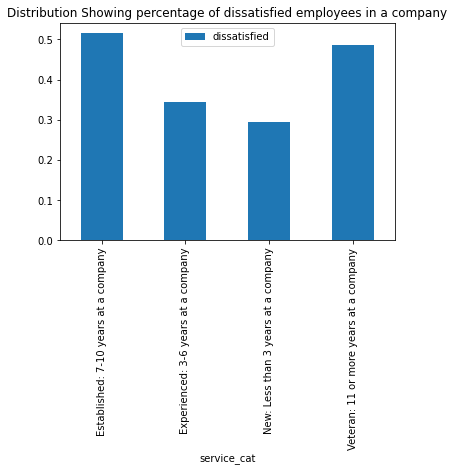

In [343]:
combined_updated.pivot_table(index= "service_cat", values="dissatisfied").plot(kind="bar", title="Distribution Showing percentage of dissatisfied employees in a company")

In [346]:
#Regular Expressions Basics

hacker = pd.read_csv("hacker_news.csv")

In [348]:
m = re.search("and", "freehand")
print(m)

<re.Match object; span=(5, 8), match='and'>


In [351]:
string_list = ["Julie's favourite colour is Blue", "Keli's favourite colour is Green", "Crag's favourite colours are blue and red"]
pattern = "[Bb]lue"
for s in string_list:
    if re.search(pattern, s):
        print("Match")
    else:
        print("No Match")

Match
No Match
Match


In [353]:
blue_mentions = 0

pattern = "[Bb]lue"

for s in string_list:
    if re.search(pattern, s):
        blue_mentions += 1
        
print (blue_mentions)

2


In [355]:
hacker["title"]

0                                Interactive Dynamic Video
1        How to Use Open Source and Shut the Fuck Up at...
2        Florida DJs May Face Felony for April Fools' W...
3             Technology ventures: From Idea to Enterprise
4        Note by Note: The Making of Steinway L1037 (2007)
                               ...                        
20095    How Purism Avoids Intels Active Management Tec...
20096            YC Application Translated and Broken Down
20097    Microkernels are slow and Elvis didn't do no d...
20098                        How Product Hunt really works
20099    RoboBrowser: Your friendly neighborhood web sc...
Name: title, Length: 20100, dtype: object

In [356]:
python_mentions = 0
pattern = "[Pp]ython"
titles = hacker["title"]

for s in titles:
    if re.search(pattern, s):
        python_mentions += 1
        
        
python_mentions

160

In [358]:
eg_list = ["Julie's favourite colour is Blue", "Keli's favourite colour is Green", "Crag's favourite colours are blue and red"]

eg_series = pd.Series(eg_list)
eg_series

0             Julie's favourite colour is Blue
1             Keli's favourite colour is Green
2    Crag's favourite colours are blue and red
dtype: object

In [362]:
pattern = "[Bb]lue"
pattern_contained = eg_series.str.contains(pattern)
print(pattern_contained)
pattern_count = pattern_contained.sum()
pattern_count

0     True
1    False
2     True
dtype: bool


2

In [364]:
pattern_count = eg_series.str.contains(pattern).sum()
pattern_count

2

In [366]:
pattern = "[Pp]ython"
titles = hacker["title"]

python_mentions = titles.str.contains(pattern).sum()
python_mentions

160

In [370]:
ruby_titles = hacker[hacker["title"].str.contains("[Rr]uby")]
ruby_titles

,id,title,url,num_points,num_comments,author,created_at
191,11639807,Ruby on Google AppEngine Goes Beta,https://cloudplatform.googleblog.com/2016/05/R...,4,1,mark_l_watson,5/5/2016 21:31
485,11755791,Related: Pure Ruby Relational Algebra Engine,https://github.com/seansellek/related,102,29,flipandtwist,5/23/2016 18:27
1389,11406835,Show HN: HTTPalooza Ruby's greatest HTTP clie...,http://httpalooza.com,9,2,100k,4/1/2016 17:43
1950,10323292,Rewriting a Ruby C Extension in Rust: How a Na...,https://www.youtube.com/watch?v=2BdJeSC4FFI,5,2,brobinson,10/3/2015 9:57
2023,10287964,Show HN: CrashBreak Reproduce exceptions as f...,http://www.crashbreak.com/,37,9,mjaneczek,9/27/2015 21:17
2164,11177804,Ruby 2.3 Is Only 4% Faster than 2.2,http://ruby-performance-book.com/blog/2016/02/...,3,3,adymo,2/25/2016 21:08
2307,12420561,"Websocket Shootout: Clojure, C++, Elixir, Go, ...",https://hashrocket.com/blog/posts/websocket-sh...,83,37,blahedo,9/3/2016 19:04
2621,11578346,Why Startups Use Ruby on Rails?,http://mlsdev.com/en/blog/61-why-startups-use-...,1,1,MLSDev,4/27/2016 6:58
2646,11056341,Ask HN: Should I continue working a Ruby gem f...,NaN,2,2,nambante,2/8/2016 4:33
3291,12153065,Ruby on Rails and the importance of being stup...,https://blogs.harvard.edu/philg/2009/05/18/rub...,5,2,wtbob,7/24/2016 11:48


In [379]:
#extract
#Quantifier    Pattern   Explanation
#Numeric        a{3}     The Character a three times
#Numeric        a{3,5}   The Character a three, four, or five time
#Numeric        a{,3}    The character a zero, one, two, or three times
#Numeric        a{8,}    The character a eight or more times


#Quantifier    Pattern  Equivalent  Explanation
#Zero or more  a*        a{0,}      The character a zero or more times
#One or more   a+        a{1,}      The Character a one or more times
#Optional      a?        a{0,1}     The character a zero or one times

#\[pdf\] The backslash is to escape the opening and closing brackets, else this pattern will be considered a set 
#that precedes a substring


#Character Class  Pattern      Explanation
#Set              [fud]        Either f, u or d
#Range            [a-e]        Any of the characters a, b, c, d, or e
#Range            [0-3]        Any of the characters 0, 1, 2, or 3
#Range            [A-Z]        Any uppercase letter
#Set + Range      [A-Za-z]     Any uppercase or lowercase letter


#Character Class  Pattern      Explanation
#Digit            \d           Any digit character (equivalent to [0-9])
#Word             \w           Any digit, uppercase, lowercase, or underscore character (equivalent to [A-Za-z0-9_])
#Whitespace       \s           Any space, tab or linebreak character
#Dot              \.           Any character except newline
#Newline          \n           Any new line
#Backspace        \b           Back space or word boundary anchor

#Note that \ is used to escape sequences that might lead to inconsistencies in our pattern or introduce a new pattern 
#Note that "?" is used to place a character on conditional matching, just incase it exists in the string, 
#it picks it up as a match


email_bool = hacker["title"].str.contains("e-?mail")
email_count = email_bool.sum()
email_titles = hacker[email_bool]
email_titles

,id,title,url,num_points,num_comments,author,created_at
120,10603601,Show HN: Send an email from your shell to your...,https://ping.registryd.com,4,1,ybrs,11/20/2015 20:23
314,10736929,Disposable emails for safe spam free shopping,http://couponinbox.com,1,1,genesem,12/15/2015 10:20
1362,11079401,Ask HN: Doing cold emails? helps us prove this...,NaN,8,12,going_to_800,2/11/2016 10:48
1751,12021044,"Protect yourself from spam, bots and phishing ...",http://die.life?x=3,4,2,code2crud,7/2/2016 2:04
2422,10934913,Ashley Madison hack treating email,http://pastebin.com/V5tmcFXq,7,4,hippich,1/19/2016 23:24
...,...,...,...,...,...,...,...
18099,12535872,House panel looking into Reddit post about Cli...,http://thehill.com/policy/national-security/29...,457,426,monochromatic,9/20/2016 0:13
18584,11777162,"Mailgen Generates clean, responsive HTML for ...",https://www.npmjs.com/package/mailgen,102,19,eladnava,5/26/2016 11:41
18848,10241261,Show HN: Crisp iOS keyboard for email and text...,https://itunes.apple.com/us/app/crisp-email-te...,6,1,chasefinch,9/18/2015 18:47
19304,11033963,Ask HN: Why big email providers don't sign the...,NaN,3,1,ddalex,2/4/2016 14:10


In [385]:
pattern = "\[\w+\]"
tag_titles = hacker[hacker["title"].str.contains(pattern)]
tag_count = tag_titles.shape[0]
tag_count

444

In [386]:
#It is better to work with raw string in patterns instead of using th backslash to escape sequences that can make oour patterns inconsistent
#Raw string as r"(words to match)"

tag_5 = tag_titles.head()
tag_5

,id,title,url,num_points,num_comments,author,created_at
67,10581844,"Analysis of 114 propaganda sources from ISIS, ...",http://37.252.122.95/sites/default/files/Insid...,1,1,crosre,11/17/2015 15:53
101,12153139,Munich Gunman Got Weapon from the Darknet [Ger...,http://www.sueddeutsche.de/panorama/eil-amoksc...,3,1,p01926,7/24/2016 12:30
160,10213207,File indexing and searching for Plan 9 [pdf],http://lsub.org/ls/export/tags.pdf,49,11,vezzy-fnord,9/14/2015 0:19
163,10518372,"Attack on Kunduz Trauma Centre, Afghanistan I...",http://kunduz.msf.org/pdf/20151030_kunduz_revi...,3,1,andreasley,11/6/2015 8:28
196,11860564,[Beta] Speedtest.net HTML5 Speed Test,http://beta.speedtest.net/,1,1,cquanu,6/8/2016 7:12


In [393]:
pattern = r"\[(\w+)\]"
tag_freq = hacker["title"].str.extract(pattern, expand=False).value_counts()
tag_freq

In [396]:
def first_ten(pattern):
    all_matches = hacker[hacker["title"].str.contains(pattern)]
    return all_matches.head(10)


pattern = r"([Jj]ava[^Ss])"
first_ten(pattern)

C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,id,title,url,num_points,num_comments,author,created_at
437,11895088,"Unikernel Power Comes to Java, Node.js, Go, an...",http://www.infoworld.com/article/3082051/open-...,3,1,syslandscape,6/13/2016 16:23
812,10741251,Ask HN: Are there any projects or compilers wh...,NaN,1,2,ggonweb,12/15/2015 23:26
1841,11348277,Adopting RxJava on the Airbnb App,https://realm.io/news/kau-felipe-lima-adopting...,47,11,astigsen,3/23/2016 21:10
1973,10634438,Node.js vs. Java: Which Is Faster for APIs?,https://www.linkedin.com/pulse/nodejs-vs-java-...,2,1,wslh,11/26/2015 19:53
2094,11118115,Java EE and Microservices in 2016,http://www.infoq.com/news/2016/02/javaee-micro...,1,1,chhum,2/17/2016 14:43
2368,12402850,"Code that is valid in both PHP and Java, and p...",https://gist.github.com/forairan/b1143f42883b3...,405,88,adamnemecek,9/1/2016 2:55
2494,12096559,Ask HN: I've been a java dev for a couple of y...,NaN,3,5,eecks,7/14/2016 19:28
2752,12101323,Eventsourcing for Java 0.4.0 released,https://es4j.eventsourcing.com/docs/0.4.0/,4,2,yrashk,7/15/2016 14:45
2911,12566258,2016 JavaOne Intel Keynote 32mn Talk,https://www.youtube.com/watch?v=MAi1eHpLY5M,1,1,BenoitP,9/23/2016 17:16
3453,11370963,What are the Differences Between Java Platform...,http://electronicdesign.com/embedded/what-are-...,17,15,pjmlp,3/27/2016 18:40


In [397]:
java_titles = hacker[hacker["title"].str.contains(pattern)].head(10)
java_titles

,id,title,url,num_points,num_comments,author,created_at
437,11895088,"Unikernel Power Comes to Java, Node.js, Go, an...",http://www.infoworld.com/article/3082051/open-...,3,1,syslandscape,6/13/2016 16:23
812,10741251,Ask HN: Are there any projects or compilers wh...,NaN,1,2,ggonweb,12/15/2015 23:26
1841,11348277,Adopting RxJava on the Airbnb App,https://realm.io/news/kau-felipe-lima-adopting...,47,11,astigsen,3/23/2016 21:10
1973,10634438,Node.js vs. Java: Which Is Faster for APIs?,https://www.linkedin.com/pulse/nodejs-vs-java-...,2,1,wslh,11/26/2015 19:53
2094,11118115,Java EE and Microservices in 2016,http://www.infoq.com/news/2016/02/javaee-micro...,1,1,chhum,2/17/2016 14:43
2368,12402850,"Code that is valid in both PHP and Java, and p...",https://gist.github.com/forairan/b1143f42883b3...,405,88,adamnemecek,9/1/2016 2:55
2494,12096559,Ask HN: I've been a java dev for a couple of y...,NaN,3,5,eecks,7/14/2016 19:28
2752,12101323,Eventsourcing for Java 0.4.0 released,https://es4j.eventsourcing.com/docs/0.4.0/,4,2,yrashk,7/15/2016 14:45
2911,12566258,2016 JavaOne Intel Keynote 32mn Talk,https://www.youtube.com/watch?v=MAi1eHpLY5M,1,1,BenoitP,9/23/2016 17:16
3453,11370963,What are the Differences Between Java Platform...,http://electronicdesign.com/embedded/what-are-...,17,15,pjmlp,3/27/2016 18:40


In [399]:
#r"\[(\w+)\]"

#\b Is an instance also know as word boundary anchor in a pattern, i.e a word that is not followed by any word character
#More generally in RegEx, an anchor is used to match a non-character that is found in a pattern
#There are the beginning anchor and end anchor, which represents the start and the end of the string, respectively 

#Anchor    Pattern    Explanation
#Beginning ^abc       Matches abc only at the start of the string
#End       abc$       Matches abc only at the end of the string


pattern = r"(\b[Jj]ava\b)"
java_titles = hacker[hacker["title"].str.contains(pattern)]
java_titles

,id,title,url,num_points,num_comments,author,created_at
437,11895088,"Unikernel Power Comes to Java, Node.js, Go, an...",http://www.infoworld.com/article/3082051/open-...,3,1,syslandscape,6/13/2016 16:23
812,10741251,Ask HN: Are there any projects or compilers wh...,NaN,1,2,ggonweb,12/15/2015 23:26
1024,11047915,Pippo Web framework in Java,http://www.pippo.ro/,93,25,networked,2/6/2016 14:46
1973,10634438,Node.js vs. Java: Which Is Faster for APIs?,https://www.linkedin.com/pulse/nodejs-vs-java-...,2,1,wslh,11/26/2015 19:53
2094,11118115,Java EE and Microservices in 2016,http://www.infoq.com/news/2016/02/javaee-micro...,1,1,chhum,2/17/2016 14:43
2368,12402850,"Code that is valid in both PHP and Java, and p...",https://gist.github.com/forairan/b1143f42883b3...,405,88,adamnemecek,9/1/2016 2:55
2494,12096559,Ask HN: I've been a java dev for a couple of y...,NaN,3,5,eecks,7/14/2016 19:28
2752,12101323,Eventsourcing for Java 0.4.0 released,https://es4j.eventsourcing.com/docs/0.4.0/,4,2,yrashk,7/15/2016 14:45
3229,11192952,Comparing Rust and Java,https://llogiq.github.io/2016/02/28/java-rust....,268,114,Manishearth,2/28/2016 23:45
3453,11370963,What are the Differences Between Java Platform...,http://electronicdesign.com/embedded/what-are-...,17,15,pjmlp,3/27/2016 18:40


In [401]:
beginning_count = hacker["title"].str.contains(r"(^\[\w+\])").sum()
ending_count = hacker["title"].str.contains(r"(\[\w+\]$)").sum()
print (beginning_count,ending_count)

15 417


In [402]:
pattern = r"(\be[\-\s]?mails?\b)"
email_mentions = hacker["title"].str.contains(pattern, flags=re.I).sum()
email_mentions

141

In [405]:
#Advanced Regular Expressions

pattern = r"(Sql)"
sql_counts = hacker["title"].str.contains(pattern, flags=re.I).sum()
sql_counts

108

In [411]:
hn_sql = hacker[hacker["title"].str.contains(r"(\w+SQL)", flags=re.I)]
pattern= r"(\w+SQL)"
hn_sql["flavour"] = hacker["title"].str.extract(r"(\w+SQL)", flags=re.I, expand=False)
hn_sql

C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,title,url,num_points,num_comments,author,created_at,flavour
143,10957172,PostgreSQL: Linux VS Windows part 2,http://www.sqig.net/2016/01/postgresql-linux-v...,16,3,based2,1/23/2016 4:21,PostgreSQL
222,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32,MemSQL
883,10413272,Pgmemcahe :A PostgreSQL memcache functions,https://github.com/ohmu/pgmemcache/,2,1,websec,10/19/2015 14:55,PostgreSQL
1161,10546681,How to choose an in-memory NoSQL solution: Per...,http://articles.rvncerr.org/how-to-chose-an-in...,9,4,rvncerr,11/11/2015 14:04,NoSQL
1198,11583183,Postgraphql: A GraphQL schema created by refle...,https://github.com/calebmer/postgraphql,217,24,craigkerstiens,4/27/2016 18:29,PostgreSQL
1371,10532855,"MI6 (SIS) Is Developing a Node.js, Angular, No...",https://recruitmentservices.applicationtrack.c...,35,47,haser_au,11/9/2015 13:24,NoSQL
2431,12300670,Tracker: Ingesting MySQL data at scale Part 2,https://engineering.pinterest.com/blog/tracker...,3,1,rwultsch,8/16/2016 21:08,MySQL
2433,10361294,SQL for NoSQL: Couchbase N1QL Tutorial,http://query.pub.couchbase.com/tutorial/#1,9,1,porker,10/9/2015 16:38,NoSQL
4547,11437660,"Finally, multiple synchronous replication for ...",http://git.postgresql.org/gitweb/?p=postgresql...,8,1,snaky,4/6/2016 9:28,PostgreSQL
4569,10725042,Getting started with NoSQL databases and MongoDB,http://www.danielgynn.com/getting-started-mong...,1,1,danielgynn,12/13/2015 1:39,NoSQL


In [412]:
hn_sql["flavour"] = hn_sql["flavour"].str.lower()
sql_pivot = hn_sql.pivot_table(index="flavour", values="num_comments")
sql_pivot

C:\Users\DamilareAkinlotan\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,num_comments
flavour,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


In [416]:
hacker["title"].str.extract(r"(python [\d\.]+)", flags=re.I, expand=False).value_counts(dropna=False)

NaN             20077
Python 3           10
Python 3.5          3
Python 2            2
Python 3.6          2
Python 4            1
Python 3.5.0        1
Python 8            1
Python 1.5          1
Python 2.7          1
python 2            1
Name: title, dtype: int64

In [424]:
py_versions = hacker["title"].str.extract(r"python ([\d\.]+)", flags=re.I, expand=False).value_counts()
py_version_freq = dict(py_versions)
py_version_freq

{'3': 10,
 '2': 3,
 '3.5': 3,
 '3.6': 2,
 '4': 1,
 '2.7': 1,
 '8': 1,
 '3.5.0': 1,
 '1.5': 1}

In [425]:
first_ten(r"(\b[Cc]\b)")

,id,title,url,num_points,num_comments,author,created_at
14,11587596,Custom Deleters for C++ Smart Pointers,http://www.bfilipek.com/2016/04/custom-deleter...,59,18,ingve,4/28/2016 10:01
221,11588479,"Lisp, C++: Sadness in my heart",http://thread.gmane.org/gmane.lisp.lispworks.g...,3,1,deepaksurti,4/28/2016 13:05
222,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32
354,11589092,VW C.E.O. Personally Apologized to President O...,http://www.nytimes.com/2016/04/29/business/int...,1,1,KKKKkkkk1,4/28/2016 14:30
366,12500621,The new C standards are worth it,http://lemire.me/blog/2016/09/14/the-new-c-sta...,4,1,ingve,9/14/2016 19:48
445,10980715,Moz raises $10m Series C from Foundry Group,https://moz.com/blog/moz-announces-10-million-...,3,1,Roedou,1/27/2016 15:59
509,10376908,BDE 3.0 (Bloomberg's core C++ library): Open S...,https://github.com/bloomberg/bde/wiki/BDE-3.0:...,2,1,frutiger,10/12/2015 20:55
522,12334544,Fuchsia: Micro kernel written in C by Google,https://github.com/fuchsia-mirror/magenta,22,12,tnorgaard,8/22/2016 6:55
550,12470519,How to Become a C.E.O.? The Quickest Path Is a...,http://www.nytimes.com/2016/09/11/upshot/how-t...,133,65,hvo,9/10/2016 19:18
1283,10992449,A lightweight C++ signals and slots implementa...,https://github.com/pbhogan/Signals,93,38,hellofunk,1/28/2016 23:43


In [426]:
#The pattern below matches instances where
#(1) the character is either C or C with no predcessor or successor(no character precedes or follows) - \b[Cc]\b
#(2) the match excludes any characters or more after the C or c character (In this case it is worth noting that if the c character is at the end of the string, it won't recognise it as a match) 

pattern = r"(\b[Cc]\b[^.+])"
first_ten(pattern)

,id,title,url,num_points,num_comments,author,created_at
366,12500621,The new C standards are worth it,http://lemire.me/blog/2016/09/14/the-new-c-sta...,4,1,ingve,9/14/2016 19:48
445,10980715,Moz raises $10m Series C from Foundry Group,https://moz.com/blog/moz-announces-10-million-...,3,1,Roedou,1/27/2016 15:59
522,12334544,Fuchsia: Micro kernel written in C by Google,https://github.com/fuchsia-mirror/magenta,22,12,tnorgaard,8/22/2016 6:55
1308,10221109,"Show HN: Yupp, yet another C preprocessor",https://github.com/in4lio/yupp,26,9,in4lio,9/15/2015 15:15
1327,10648831,The C standard formalized in Coq,http://robbertkrebbers.nl/thesis.html,231,109,janvdberg,11/30/2015 11:14
1366,11157185,GNU C Library 2.23 released,http://lwn.net/Articles/676727/,1,1,OrangeTux,2/23/2016 7:22
1430,11071996,"Cysignals: signal handling (SIGINT, SIGSEGV, )...",https://github.com/sagemath/cysignals,4,1,martinralbrecht,2/10/2016 11:28
1621,11036994,SDCC Small Device C Compiler,http://sdcc.sourceforge.net/,51,23,vmorgulis,2/4/2016 20:35
1950,10323292,Rewriting a Ruby C Extension in Rust: How a Na...,https://www.youtube.com/watch?v=2BdJeSC4FFI,5,2,brobinson,10/3/2015 9:57
2196,11270963,MyHTML HTML Parser on Pure C with POSIX Threa...,http://lexborisov.github.io/myhtml/,123,18,yxlx,3/12/2016 2:09


In [427]:
#Lookarounds let us define a character or sequence of characters that either must or must not come before or after our regex match.
#There are four types of Lookarounds
#Look around           Pattern         Explanation
#Positive lookahead    zzz(?=abc)      Matches zzz only when it is followed by abc
#Negative lookahead    zzz(?!abc)      Matches zzz only when it is NOT followed by abc
#Positive lookbehind   (?<=abc)zzz     Matches zzz only when it is preceded by abc
#Negative lookbehind   (?<!abc)zzz     Matches zzz only when it is NOT preceded by abc



In [433]:
#The pattern below matches instances of C or c when they are not preceded or followed by another word character - \b[Cc]\b
#From the below match, we excluded:
#(1) instances where it is followed by a "." or "+" character, without removing instances where the match occurs at the 
#end of the string  - (?![\+\.])
#(2) instances where the word "Series" immediately precedes the match - (?<!Series\s)

#Dear Damilare, please note that are two way we could use regex pattern methods
#(1) the re.search(pattern, string, IgnoreCase param) module and
#(2) the serise.str.contains/extract(pattern, IgnoreCase param, expand param) module

pattern = r"((?<!Series\s)\b[Cc]\b(?![\+\.]))"
c_mentions = hacker["title"].str.contains(pattern, flags=re.I).sum()
c_mentions 

102

In [434]:
#This pattern matches and returns characters that appears double in a string, e.g th double o in food, good. e in pee, see., et.c
#The integer after the word character is used to refer to that group, in a shortened form (i.e \1 = \w)

pattern = r"\b(\w+)\s\1\b"
repeated_words = hacker[hacker["title"].str.contains(pattern, re.I)]
repeated_words

,id,title,url,num_points,num_comments,author,created_at
3103,11855946,Silicon Valley Has a Problem Problem,https://medium.com/life-learning/silicon-valle...,11,3,yusufp,6/7/2016 17:18
3177,12242011,Wire Wire: A West African Cyber Threat,https://www.secureworks.com/research/wire-wire...,28,4,chewymouse,8/7/2016 13:24
3179,10246063,Flexbox Cheatsheet Cheatsheet,http://jonibologna.com/flexbox-cheatsheet/,4,1,_aarti,9/20/2015 0:24
4798,11271821,The Mindset Mindset (2015),http://www.alfiekohn.org/article/mindset/,18,3,jimsojim,3/12/2016 8:14
7277,11086933,"Valentine's Day Special: Bye Bye Tinder, Flirt...",https://www.stackfield.com/blog/bye-bye-tinder...,100,104,rolfos,2/12/2016 13:14
10372,12209118,Mcdonalds copying cyriak cows cows cows in th...,https://twitter.com/cyriakharris/status/760435...,4,2,itayadler,8/2/2016 11:28
11576,11450683,Bang Bang Control,https://en.wikipedia.org/wiki/Bang%E2%80%93ban...,30,24,dedalus,4/7/2016 21:01
11902,11102051,Cordless Telephones: Bye Bye Privacy (1991),http://readtext.org/hamradio/cordless-telephon...,43,9,tux,2/15/2016 8:05
12698,10297271,Solving the the Monty-Hall-Problem in Swift,http://www.thomashanning.com/swift-playground-...,3,1,ingve,9/29/2015 16:06
15050,10425206,Bye Bye Webrtc2SIP: WebRTC with Asterisk and A...,http://marcelog.github.io/articles/webrtc_with...,2,1,marcelog,10/21/2015 13:24


In [445]:
variations = pd.Series(["email", "Email", "e Mail", "e mail", "E-mail", "e-mail", "eMail", "E-Mail", "EMAIL"])
pattern = r"(e[\-\s]?mail)"
#email_uniform= variations.str.replace(pattern, repl="email", flags=re.I)
titles_clean = hacker["title"].str.replace(pattern, repl="email", flags=re.I)

#re.sub(pattern, repl, flag) is an alternative to the pandas method

#The bracket in th pattern above represents a set which reads into each character as "\-" or "\s", an hyphen or while space
#Any and all of the  matches that fall into these patterns

In [459]:
pattern = r"(https?://[\w\-\.]+)"
domains = hacker["url"].str.extract(pattern, flags=re.I, expand=False)
domains

0        http://www.interactivedynamicvideo.com
1                         http://hueniverse.com
2                        http://www.thewire.com
3                        https://www.amazon.com
4                        http://www.nytimes.com
                          ...                  
20095                           https://puri.sm
20096                        https://medium.com
20097                 http://blog.darknedgy.net
20098                        https://medium.com
20099                        https://github.com
Name: url, Length: 20100, dtype: object

In [470]:
#Remember that r"()" creates capture groups which form their own columns in our results
#For each () r"", a capture group is crdated, a column is created in our result

#Note that \ is used to escape sequences that might lead to inconsistencies in our pattern or introduce a new pattern 
#Note that "?" is used to place a character on conditional matching, just incase it exists in the string, it picks it up as a match

pattern = r"(https?)://([\w\.\-]+)/?(.*)"
url_parts = hacker["url"].str.extract(pattern, flags=re.I, expand=False)
url_parts

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,hueniverse.com,2016/01/26/how-to-use-open-source-and-shut-the...
2,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
3,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
4,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
...,...,...,...
20095,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20096,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20097,http,blog.darknedgy.net,technology/2016/01/01/0/
20098,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...


In [462]:
pattern_2 = r"(?P<protocol>https?)://(?P<domain>[\w\.\-]+)/?(?P<path>.*)"
url_parts_2 = hacker["url"].str.extract(pattern_2, flags=re.I)
url_parts_2

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,hueniverse.com,2016/01/26/how-to-use-open-source-and-shut-the...
2,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
3,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
4,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
...,...,...,...
20095,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20096,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20097,http,blog.darknedgy.net,technology/2016/01/01/0/
20098,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...


In [468]:
#List Comprehension and Lambda functions


hacker["created_at"].str.extract(r"([0-9]{2}/[0-9]{2}/[0-9]{4}\b)",flags=re.I, expand=False).value_counts(dropna=False)

NaN           16645
11/12/2015       82
12/10/2015       79
10/27/2015       75
11/23/2015       75
              ...  
12/13/2015       34
12/20/2015       33
11/21/2015       33
12/19/2015       31
10/11/2015       30
Name: created_at, Length: 66, dtype: int64

In [473]:
json_string = """
[
    {
        "name": "Sabine",
    "age" : 36,
    "favourite_foods": ["Pumpkin", "Oatmeal"]
    },
    {
     "name": "Zoe",
     "age" : 40,
     "favourite_foods": ["Chicken", "Pizza", "Chocolate"]
    },
    {
    "name": "Heidi",
     "age" : 40,
     "favourite_foods": ["Ceasar Salad"]    
    }
] """
json_obj = json.loads(json_string)
print (type(json_obj))

<class 'list'>


In [474]:
print(json_obj)

[{'name': 'Sabine', 'age': 36, 'favourite_foods': ['Pumpkin', 'Oatmeal']}, {'name': 'Zoe', 'age': 40, 'favourite_foods': ['Chicken', 'Pizza', 'Chocolate']}, {'name': 'Heidi', 'age': 40, 'favourite_foods': ['Ceasar Salad']}]


In [476]:
world_cup_str = """
[
{
"team_1": "France",
"team_2": "Croatia",
"game_type": "Final",
"score" : [4,2]
},
{
"team_1": "Belguim",
"team_2": "England",
"game_type": "3rd/4th Playoff",
"score" : [2,0]
}] """

world_cup_obj = json.loads(world_cup_str)
world_cup_obj

[{'team_1': 'France',
  'team_2': 'Croatia',
  'game_type': 'Final',
  'score': [4, 2]},
 {'team_1': 'Belguim',
  'team_2': 'England',
  'game_type': '3rd/4th Playoff',
  'score': [2, 0]}]

In [480]:
#This is a line of code to open and rhead a JSON fil into python jupyter
file = open("hn_2014.json")
hn = json.load(file)
len(hn)

35806

In [481]:
hn[0].keys()

dict_keys(['author', 'numComments', 'points', 'url', 'storyText', 'createdAt', 'tags', 'createdAtI', 'title', 'objectId'])

In [486]:
hn_clean = []
def del_key(dict_, key):
    #create a copy so w don't modify the original data
    #modify the original data
    modified_dict = dict_.copy()
    del modified_dict[key]
    return modified_dict

for d in hn:
    
    new_d = del_key(d, "createdAtI")
    hn_clean.append(new_d)
    
#hn_clean

In [494]:
#This is the default format of a list comprehension
#where
#target value is the assigning variable
#transformation is the result/line(s) of code that will be applied to the target variable
#the for statement is the statement that helps iterate over the list, as this is a list comprehension in JSON

#target_val -----transformation----  -for statement-
#     ~                 ~                    ~
hn_clean = [del_key(d, "createdAtI") for d in hn]
print(hn[0])

{'author': 'dragongraphics', 'numComments': 0, 'points': 2, 'url': 'http://ashleynolan.co.uk/blog/are-we-getting-too-sassy', 'storyText': '', 'createdAt': '2014-05-29T08:07:50Z', 'tags': ['story', 'author_dragongraphics', 'story_7815238'], 'createdAtI': 1401350870, 'title': 'Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability', 'objectId': '7815238'}


In [492]:
url = [ dic["url"] for dic in hn_clean]
url[0:5]

['http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
 'http://spectrum.ieee.org/automaton/robotics/home-robots/telemba-telepresence-robot',
 'http://online.wsj.com/articles/apple-to-buy-beats-1401308971',
 'http://alexsblog.org/2014/05/29/dont-wait-for-inspiration/',
 'http://techcrunch.com/2014/05/28/hackerone-get-9m-in-series-a-funding-to-build-bug-tracking-bounty-programs/']

In [495]:
#if our comprehension list has an if statement in the lines of the code
#the if statement is often written at the extreme of the line of code, close to the closing square bracket
#Just as it demonstrated below, note that the transformed variable is th single letter p in the line of code below
thousand_points = [p for p in hn_clean if p["points"]>1000]
num_thousand_points = len(thousand_points)
print(num_thousand_points)

8


In [497]:
def get_comment(dict_):
    return dict_["numComments"]

most_comments = max(hn_clean, key=get_comment)
most_comments

{'author': 'platz',
 'numComments': 1208,
 'points': 889,
 'url': 'https://blog.mozilla.org/blog/2014/04/03/brendan-eich-steps-down-as-mozilla-ceo/',
 'storyText': None,
 'createdAt': '2014-04-03T19:02:53Z',
 'tags': ['story', 'author_platz', 'story_7525198'],
 'title': 'Brendan Eich Steps Down as Mozilla CEO',
 'objectId': '7525198'}

In [504]:
#Lambda functions on a straight line
#To create a lambda equivalent of functions, we
#Use lambda keyword followed by
#The parameters(arguments) and a colon(:), and then
#The transformation we wish to perform on our argument
#name_of_function = lambda arguments(parameters): transformation(result) 
#It is worth noting that lambda functions can also be passed as arguments into another function
#Example is in the next cell

In [510]:
#named lambda function 
multiply = lambda a,b: a*b
#multiply(5,6)

#unnarmed lambda function passed as an argument into another function
hn_sorted_points = sorted(hn_clean, key=lambda d:d["points"], reverse=True)
top_5_titles = [p["title"] for p in hn_sorted_points]
top_5_titles[0:5]

['2048',
 'Today is The Day We Fight Back',
 'Wozniak: “Actually, the movie was largely a lie about me”',
 'Microsoft Open Sources C# Compiler',
 'Elon Musk: To the People of New Jersey']

In [513]:
hn_df = pd.DataFrame(hn_clean)
hn_df

,author,numComments,points,url,storyText,createdAt,tags,title,objectId
0,dragongraphics,0,2,http://ashleynolan.co.uk/blog/are-we-getting-t...,,2014-05-29T08:07:50Z,"[story, author_dragongraphics, story_7815238]",Are we getting too Sassy? Weighing up micro-op...,7815238
1,jcr,0,1,http://spectrum.ieee.org/automaton/robotics/ho...,,2014-05-29T08:05:58Z,"[story, author_jcr, story_7815234]",Telemba Turns Your Old Roomba and Tablet Into ...,7815234
2,callum85,0,1,http://online.wsj.com/articles/apple-to-buy-be...,,2014-05-29T08:05:06Z,"[story, author_callum85, story_7815230]",Apple Agrees to Buy Beats for $3 Billion,7815230
3,d3v3r0,0,1,http://alexsblog.org/2014/05/29/dont-wait-for-...,,2014-05-29T08:00:08Z,"[story, author_d3v3r0, story_7815222]",Don’t wait for inspiration,7815222
4,timmipetit,0,1,http://techcrunch.com/2014/05/28/hackerone-get...,,2014-05-29T07:46:19Z,"[story, author_timmipetit, story_7815191]",HackerOne Get $9M In Series A Funding To Build...,7815191
...,...,...,...,...,...,...,...,...,...
35801,lispython,0,3,https://medium.com/p/ff5f4c9b16bd,None,2014-01-01T00:33:42Z,"[story, author_lispython, story_6993601]",Engelbart and Kay,6993601
35802,co_pl_te,0,3,http://allthingsd.com/20131231/you-say-goodbye...,,2014-01-01T00:19:47Z,"[story, author_co_pl_te, story_6993568]",You Say Goodbye and We Say Hello,6993568
35803,maurorm,0,1,http://ghiraldelli.pro.br/jesus-e-eu/,None,2014-01-01T00:11:06Z,"[story, author_maurorm, story_6993544]",Jesus e eu,6993544
35804,yeukhon,0,1,,https:&#x2F;&#x2F;fundraising.mozilla.org&#x2F;,2014-01-01T00:06:59Z,"[story, author_yeukhon, story_6993536]",Mozilla end-of-year fundraising jumps from $75...,6993536


In [525]:
tags_type = hn_df["tags"].apply(type) #The elements in this serise at save as lists
tags_fil = hn_df["tags"].apply(len) == 4 #boolean to check for rows with 4 values in their tags column
four_tags = hn_df[tags_fil] #Masking out a df that shows only the colmums and rows in which the tags column has 4 elements
four_tags["tags"].str[-1] #Returning the last elemnt in each row for the tags column (the value in these rows ar lists, however)

43       show_hn
86        ask_hn
104       ask_hn
107       ask_hn
109      show_hn
          ...   
35747    show_hn
35759     ask_hn
35778     ask_hn
35787     ask_hn
35792    show_hn
Name: tags, Length: 2347, dtype: object

In [526]:
#We have a special if operator that can be used in pandas for special cases
#A ternary operator
#A ternary operator can be used whenever w need to return on of two values depending on a boolean expression
#The syntax is as follows
#[on_true] if [eexpression] else [on_false]

In [531]:
cleaned_tags = hn_df["tags"].apply(lambda l: l[-1] if len(l)==4 else None)
count_tags = cleaned_tags.value_counts(dropna=False)
hn_df["tags"] = cleaned_tags

In [532]:
hn_df.head()

,author,numComments,points,url,storyText,createdAt,tags,title,objectId
0,dragongraphics,0,2,http://ashleynolan.co.uk/blog/are-we-getting-t...,,2014-05-29T08:07:50Z,None,Are we getting too Sassy? Weighing up micro-op...,7815238
1,jcr,0,1,http://spectrum.ieee.org/automaton/robotics/ho...,,2014-05-29T08:05:58Z,None,Telemba Turns Your Old Roomba and Tablet Into ...,7815234
2,callum85,0,1,http://online.wsj.com/articles/apple-to-buy-be...,,2014-05-29T08:05:06Z,None,Apple Agrees to Buy Beats for $3 Billion,7815230
3,d3v3r0,0,1,http://alexsblog.org/2014/05/29/dont-wait-for-...,,2014-05-29T08:00:08Z,None,Don’t wait for inspiration,7815222
4,timmipetit,0,1,http://techcrunch.com/2014/05/28/hackerone-get...,,2014-05-29T07:46:19Z,None,HackerOne Get $9M In Series A Funding To Build...,7815191


In [637]:
mvc = pd.read_csv("nypd_mvc_2018.csv")
sup = pd.read_csv("supplemental_data.csv")

In [638]:
#Working with missing data
mvc

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57859,3835191,2018-01-26,14:51,BRONX,"(40.85477, -73.90299)",CRESTON AVENUE,EAST 181 STREET,NaN,3,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN,NaN
57860,3890674,2018-04-29,18:30,QUEENS,"(40.78419, -73.84582)",COLLEGE POINT BOULEVARD,15 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
57861,3946458,2018-07-21,16:45,NaN,"(40.711926, -74.0061)",PARK ROW,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN
57862,3914574,2018-06-04,5:45,NaN,"(40.71976, -73.94476)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0,0,...,Sedan,Tractor Truck Diesel,Station Wagon/Sport Utility Vehicle,NaN,NaN,Other Vehicular,Unspecified,Unspecified,NaN,NaN


In [639]:
null_counts = mvc.isnull().sum() #To get th number of random value in the dataset
null_counts_pc = null_counts / mvc.shape[0] * 100 #To get the percntage nuall values of each column in the dataset

In [640]:
null_df = pd.DataFrame({"null_counts" : null_counts, "null_counts_pc" : null_counts_pc}) 
#combining both metrics so comparison can be done easily
#Rotate our df so our rows and columns can transpose 
null_df = null_df.T.astype(int)
null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,...,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_counts_pc,0,0,0,35,6,24,50,76,0,0,...,0,21,93,98,99,0,15,93,98,99


In [641]:
#List comprehension to create a column with the killed column category
killed_col = [col for col in mvc.columns if "killed" in col]
#null_df[killed_df]
killed_col

['pedestrians_killed', 'cyclist_killed', 'motorist_killed', 'total_killed']

In [642]:
mvc.columns

Index(['unique_key', 'date', 'time', 'borough', 'location', 'on_street',
       'cross_street', 'off_street', 'pedestrians_injured', 'cyclist_injured',
       'motorist_injured', 'total_injured', 'pedestrians_killed',
       'cyclist_killed', 'motorist_killed', 'total_killed', 'vehicle_1',
       'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5', 'cause_vehicle_1',
       'cause_vehicle_2', 'cause_vehicle_3', 'cause_vehicle_4',
       'cause_vehicle_5'],
      dtype='object')

In [643]:
killed = mvc[killed_col].copy()
#killed.head()
#killed_manual_sum = mvc["pedestrians_killed"] + mvc["cyclist_killed"] + mvc["motorist_killed"]
killed_manual_sum = killed.iloc[:,0:3].sum(axis=1)
killed_mask = killed_manual_sum != mvc["total_killed"]
killed_maska = killed["total_killed"].isnull()
killed_non_eq = killed[killed_mask]
killed_non_eq
mask = killed["total_killed"] != killed_manual_sum
mask.value_counts(dropna=False)

False    57858
True         6
dtype: int64

In [644]:
#tester = killed.copy()
killed["total_killed"] = killed["total_killed"].mask(killed["total_killed"].isnull(), killed_manual_sum)
killed["total_killed"] = killed["total_killed"].mask(killed["total_killed"] != killed_manual_sum, np.nan)
killed["total_killed"].isnull().sum()

1

In [645]:
#Boolean masking in a dataframe
#The series.mask() method is useful when we want to replace certain values in a series based off a boolean mask
#The syntax for th method is shown below
#Series.mask(bool, val_to_replace)
#We use the series.mask() method to replace all values that match the boolean series with a new value
#This will replace any value in the series where the value is a np.nan value

In [646]:
#List comprehension to create a column with the injured column category
injured_col = [col for col in mvc.columns if "injured" in col]
print(injured_col)

['pedestrians_injured', 'cyclist_injured', 'motorist_injured', 'total_injured']


In [647]:
#Creating a dataframe with the columns containing data on injured people
injured = mvc[injured_col].copy()
#Summing up the total number of injured people manually from the 3 injured categories into a column
injured_manual_sum = injured.iloc[:,0:3].sum(axis=1)
#masking th boolean directly as an argument into the series.mask() method, to replace data that is not consistent
#With the manual sum and th total_injured that exists in the dataset already
test = injured.copy()
injured["total_injured"] = injured["total_injured"].mask(injured["total_injured"].isnull(), injured_manual_sum)

injured["total_injured"] = injured["total_injured"].mask(injured["total_injured"] != injured_manual_sum, np.nan)

injured["total_injured"].value_counts(dropna=False)

0.0     46615
1.0      8590
2.0      1737
3.0       550
4.0       223
5.0        77
6.0        27
NaN        21
7.0        16
9.0         2
15.0        1
10.0        1
13.0        1
14.0        1
22.0        1
8.0         1
Name: total_injured, dtype: int64

In [648]:
mvc["total_injured"] = injured["total_injured"]
mvc["total_killed"] = killed["total_killed"]
mvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57864 entries, 0 to 57863
Data columns (total 26 columns):
unique_key             57864 non-null int64
date                   57864 non-null object
time                   57864 non-null object
borough                37218 non-null object
location               53979 non-null object
on_street              43903 non-null object
cross_street           28615 non-null object
off_street             13771 non-null object
pedestrians_injured    57864 non-null int64
cyclist_injured        57864 non-null int64
motorist_injured       57864 non-null int64
total_injured          57843 non-null float64
pedestrians_killed     57864 non-null int64
cyclist_killed         57864 non-null int64
motorist_killed        57864 non-null int64
total_killed           57863 non-null float64
vehicle_1              57509 non-null object
vehicle_2              45602 non-null object
vehicle_3              3512 non-null object
vehicle_4              706 non-null object

In [649]:
mvc.isnull()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,False,False,True,True,True
1,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,True,True,True
2,False,False,False,True,False,False,True,True,False,False,...,False,False,True,True,True,False,False,True,True,True
3,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,True,True,True
4,False,False,False,False,False,True,True,False,False,False,...,False,False,True,True,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57859,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,False,True,True,True,True
57860,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,True,True,True
57861,False,False,False,True,False,False,True,True,False,False,...,False,False,True,True,True,False,False,True,True,True
57862,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,True,False,False,False,True,True


In [650]:
#The df.corr() method, this can be used to calculate the relationship between sets of columns


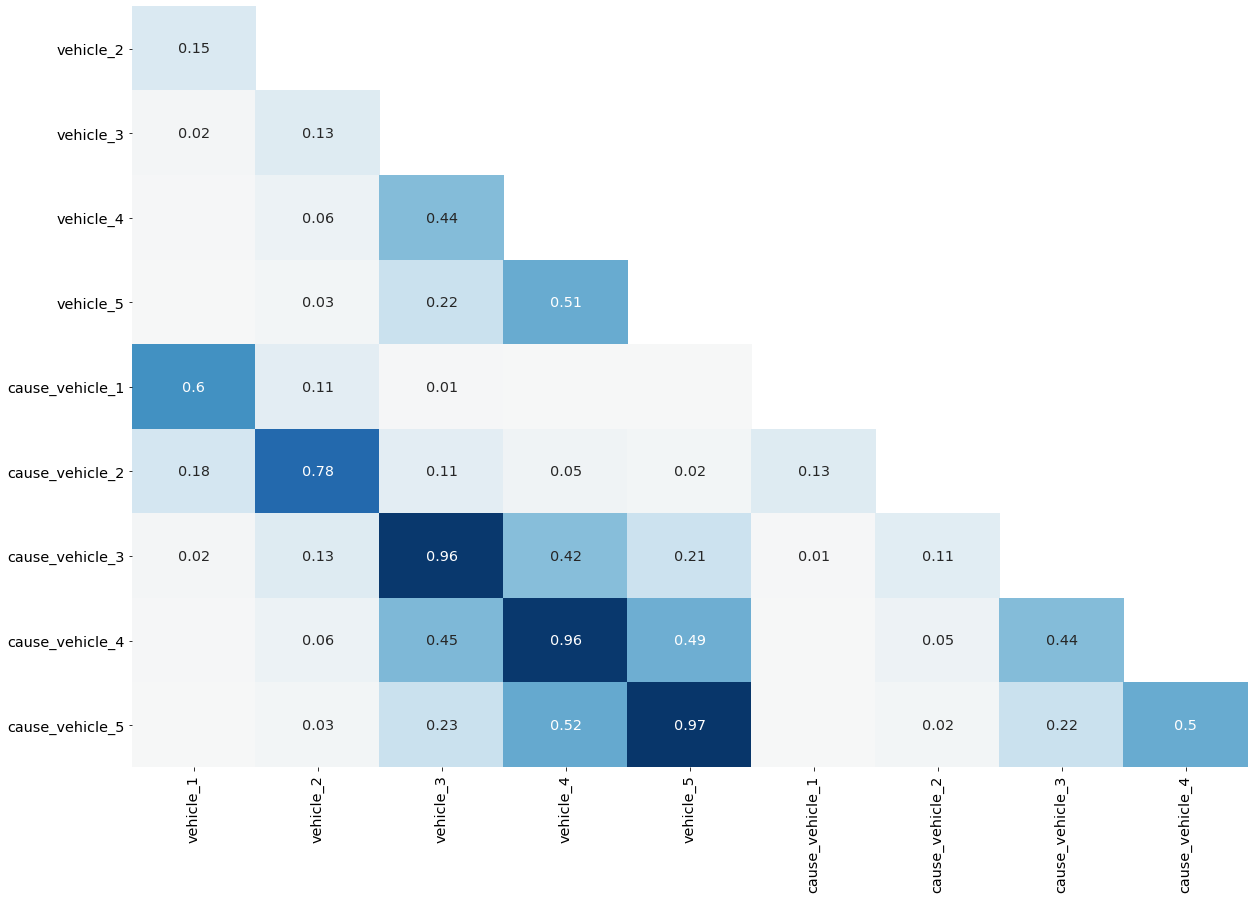

In [651]:
vehicle_col = [col for col in mvc.columns if "vehicle" in col] 
vehicle = mvc[vehicle_col]

def plot_null_correlations(df):
    #create a correlation matrix only for columns with at least one missing
    cols_with_missing_vals = df.columns[df.isnull().sum()>0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    #create a mask to avoid repeated values and make the plot easier to read
    missing_corr = missing_corr.iloc[1: , :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
                   
    #plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False, cmap="RdBu", mask=mask, annot=True)
    
    #format the text in th plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else: text.set_text(round(t, 2))
        text.set_fontsize("x-large")
        
    plt.xticks(rotation=90, size="x-large")
    plt.yticks(rotation=0, size="x-large")
    plt.show()
    
plot_null_correlations(vehicle)

In [652]:
col_labels = ["v_number", "vehicle_missing", "cause_missing"]
vc_null_data = []
for v in range(1,6):
    v_col = "vehicle_{}".format(v) #this is used to create a column name for each value of v (1,5)
    #i.e for v=1 it returns vehicle_1 and so on
    c_col = "cause_vehicle_{}".format(v) #this is used to create a column name for each value of v (1,5)
    #i.e for v=1 it returns cause_vehicle_1 and so on    
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    #This is to check for two conditions that must be true and sum them up
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
        
    vc_null_data.append([v, v_null, c_null])
    #This appends the values retturned in the above line of code as a list to the vc_null_data list variable
    
    
vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [653]:
#df.stack is used to stack all the columns in a df to one column, and hence a series with all values maintained as they were
#When we use df.stack() method, the value becomes a series object with all values stacked on top of eachother
#The series object actually has two rwo indexes, th first row index is th orifinal row index that th df comes with
#While the second row index is the row index that contains th column label for all columns that were converted to rows

In [654]:
v_cols = [col for col in mvc.columns if col.startswith("vehicle")]
v_df = mvc[v_cols]
v_stack = v_df.stack()
v_stack_count = v_stack.value_counts(dropna=False)
top_10_vehicles = v_stack_count.head(10)
top_10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

In [655]:
c_cols = [col for col in mvc.columns if col.startswith("cause")]
c_df = mvc[c_cols]
c_stack = c_df.stack()
c_stack_count = c_stack.value_counts(dropna=False)
top_10_cause = c_stack_count.head(10)
top_10_cause

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64

In [657]:
def summarize_missing():
    v_missing_data = []
    
    for v in range(1,6):
        v_col = "vehicle_{}".format(v)
        c_col = "cause_vehicle_{}".format(v)
        
        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
        
        v_missing_data.append([v, v_missing, c_missing])
        
    col_labels = columns =["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data ,columns=col_labels)

summary_before = summarize_missing()



In [658]:
#continued
for v in range(1,6):
        v_col = "vehicle_{}".format(v)
        c_col = "cause_vehicle_{}".format(v)
        
        v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
        c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()
        
        mvc[v_col] = mvc[v_col].mask(v_missing_mask, "Unspecified")
        mvc[c_col] = mvc[c_col].mask(c_missing_mask, "Unspecified")
        
summary_after = summarize_missing()
summary_before

,vehicle_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [659]:
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


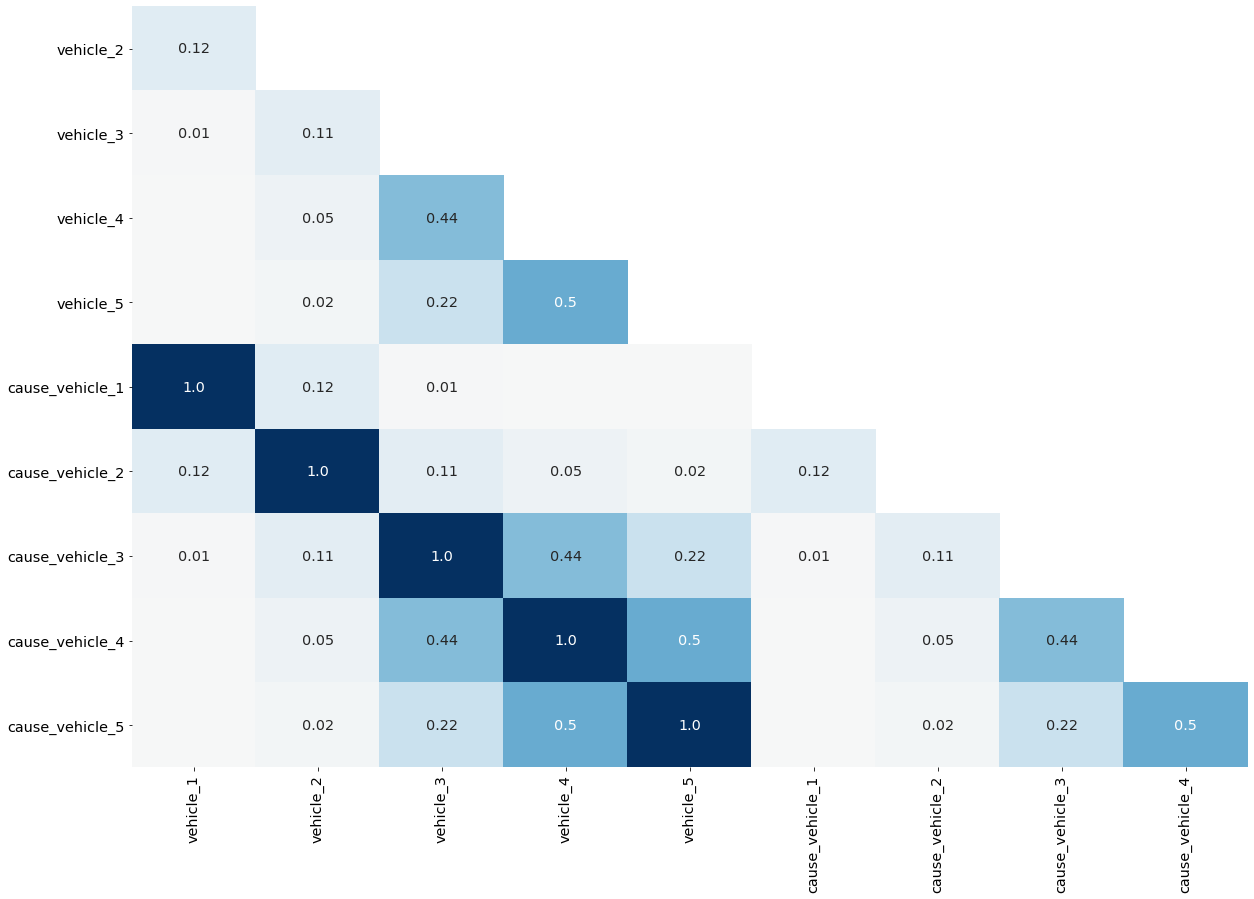

In [661]:
veh_cols = [col for col in mvc.columns if "vehicle" in col]
plot_null_correlations(mvc[veh_cols])

In [662]:
loc_cols = ["borough", "location", "on_street", "off_street", "cross_street"] 
#This represents th location where all accidents occurred
location_data = mvc[loc_cols]
location_data.isnull().sum()

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64

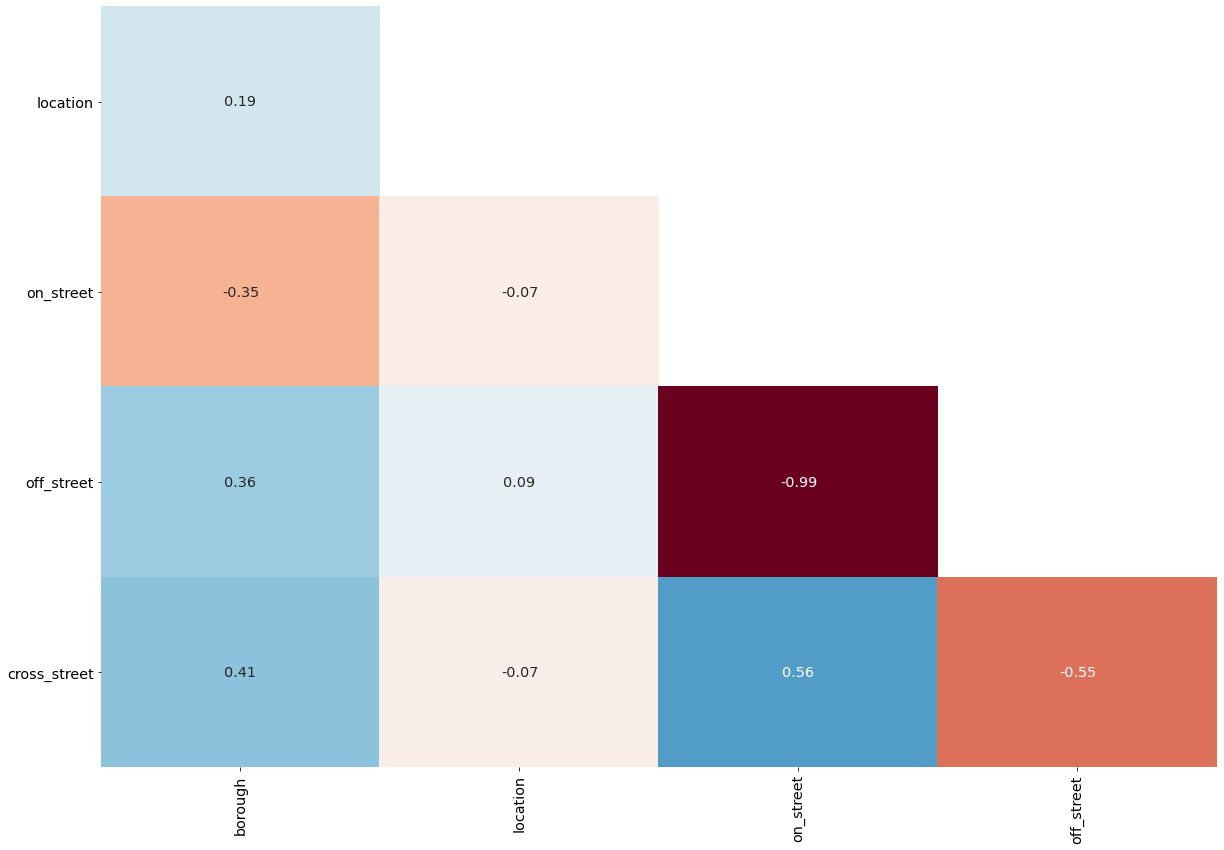

In [663]:
plot_null_correlations(location_data)
#to look for correlations between the missing values 

In [668]:
#This means that for almost every row that has a null value in on column, the other has a non_value and vice-versa

#Lets plot a null matrix, this will gather some of th null and non-null values and make patterns more obvious

In [667]:
#To fill th missing value in th mvc dataset, we created a supplemental data which will be used to fill
#the rows with missing and null values
#For rows with location values but missing values either borough or th street name columns
#geocoding APIs were used to look up th location coordinates to find the missing data
#For row with values in the street name columns missing borough and/or location data
#geocoding APIs were used to look up the address to find th missing data

sup.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


In [669]:
#To prove that the unique keys for both th supplemental data and th uniqu keys in th mvc data set are equal
#This will make it easier to replace the null values in these columns, using mask to add th supplemental to the mvc dataset
sup["unique_key"] == mvc["unique_key"]

0        True
1        True
2        True
3        True
4        True
         ... 
57859    True
57860    True
57861    True
57862    True
57863    True
Name: unique_key, Length: 57864, dtype: bool

In [670]:
location_cols = ["location", "on_street", "off_street", "borough"]

null_before = mvc[location_cols].isnull().sum()
print(null_before)
for col in location_cols:
    mvc[col] = mvc[col].mask(mvc[col].isnull(), sup[col])
    
null_after = mvc[location_cols].isnull().sum()
print(null_after)

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64
location         77
on_street     13734
off_street    36131
borough         232
dtype: int64
